<h1>Aikasarjojen kuvailua ja analysointia</h1>

Seuraavassa tarvitaan <b>pandas-datareader</b> -kirjastoa, joka ei kuulu Anacondan vakioasennukseen. Voit asentaa sen esimerkiksi seuraavasti:
<ul>
    <li>Käynnistä Anaconda Navigator ja valitse <b>Environments</b></li>
    <li>Jos <b>pandas-datareader</b> ei ole <b>Installed</b>-listassa, niin siirry <b>Not installed</b> -listaan</li>
    <li>Jos <b>pandas-datareader</b> ei löydy tästäkään listasta, niin päivitä lista (<b>Update index</b>)</li>
    <li>Valitse <b>pandas-datareader</b> ja napsauta alareunasta <b>Apply</b> ja seuraa asennuksen vaiheita.</li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Tätä tarvitaan datan noutamiseksi Yahoon-palvelusta
# Varmista, että pandas-datareader on asennettu
import pandas_datareader.data as web

%matplotlib inline

# Tyyli vaikuttaa grafiikan ulkoasuun
# Käytettävissä olevat tyylit voit listata komennolla plt.style.available
plt.style.use('seaborn-whitegrid')

<h2>Datojen nouto</h2>

Elisan ja Telian kurssihistoriat voi noutaa Yahoo Finance -palvelusta. Voit googlata muiden osakkeiden nimiä. Esimerkiksi halulla 'yahoo finance kemira' löydät Kemiran nimen Yahoossa.

In [2]:
elisa = web.DataReader('ELISA.HE', start = '2015-1-1', data_source = 'yahoo')
telia = web.DataReader('TELIA1.HE', start = '2015-1-1', data_source = 'yahoo')

In [3]:
elisa

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,22.870001,22.549999,22.610001,22.680000,206279.0,17.464106
2015-01-05,22.850000,22.309999,22.700001,22.400000,249378.0,17.248501
2015-01-07,23.139999,22.100000,22.500000,22.920000,531047.0,17.648911
2015-01-08,23.200001,22.760000,22.900000,22.830000,381383.0,17.579609
2015-01-09,23.120001,22.760000,22.809999,22.860001,305832.0,17.602713
...,...,...,...,...,...,...
2020-10-23,45.240002,44.689999,44.689999,44.849998,229445.0,44.849998
2020-10-26,44.959999,44.250000,44.799999,44.310001,297727.0,44.310001
2020-10-27,44.520000,43.669998,44.310001,43.709999,496645.0,43.709999


In [4]:
telia

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,5.360,5.285,5.340,5.305,1039894.0,0.085169
2015-01-05,5.300,5.205,5.290,5.205,929121.0,0.083564
2015-01-07,5.300,5.220,5.240,5.245,860595.0,0.084206
2015-01-08,5.410,5.260,5.260,5.405,1001285.0,0.086775
2015-01-09,5.420,5.290,5.400,5.295,917754.0,0.085009
...,...,...,...,...,...,...
2020-10-23,3.512,3.438,3.438,3.477,1158621.0,3.477000
2020-10-26,3.512,3.428,3.451,3.432,1020943.0,3.432000
2020-10-27,3.453,3.395,3.449,3.402,734921.0,3.402000


<h2>Viivakaavioita</h2>

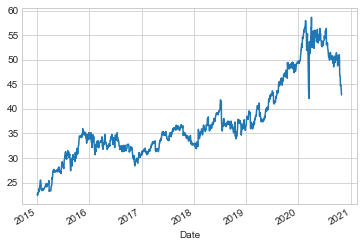

In [5]:
elisa['Close'].plot()

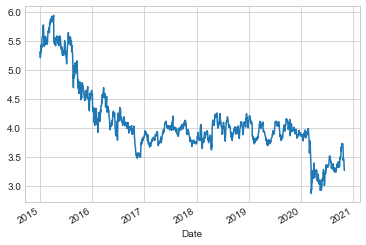

In [6]:
telia['Close'].plot()

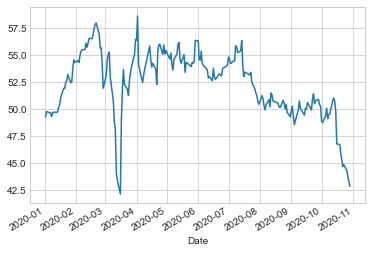

In [7]:
# Vuoden 2020 alusta
elisa['Close']['2020':].plot()

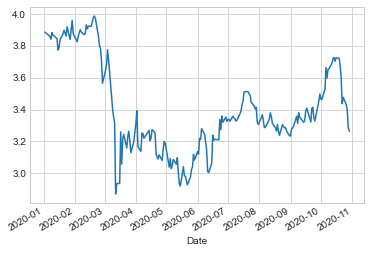

In [8]:
telia['Close']['2020'].plot()

<h2>Aggregointi</h2>

<b>resample()</b> aggregoi aikasarjan esimerkiksi päivätasolta kuukausitasolle.

resample()-toiminnon parametrina käytettäviä arvoja:

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

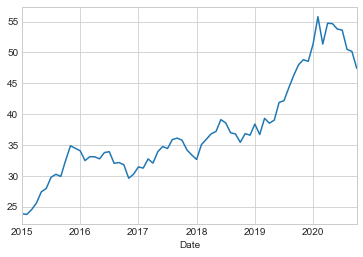

In [9]:
# Kuukausittaiset keskiarvohinnat
elisa['Close'].resample('M').mean().plot()

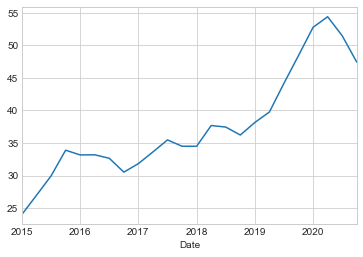

In [10]:
# Vuosineljännesten keskiarvohinnat
elisa['Close'].resample('Q').mean().plot()

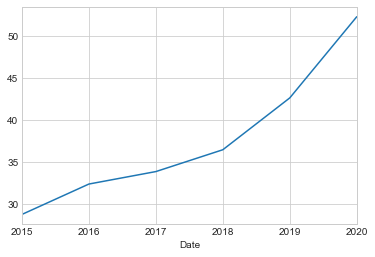

In [11]:
# Vuosien keskiarvohinnat
elisa['Close'].resample('Y').mean().plot()

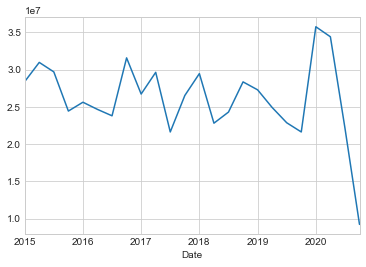

In [12]:
# Vaihdon määrä osakkeiden lukumääränä vuosineljänneksittäin
elisa['Volume'].resample('Q').sum().plot()

<h2>Liukuvia keskiarvoja</h2>

Liukuvilla keskiarvoilla tasoitetaan yksittäisiin ajankohtiin liittyviä satunnaisia piikkejä.

Teknisessä analyysissä aikasarjan ja liukuvien keskiarvojen leikkauskohtia käytetään osto- ja myyntisignaaleina.

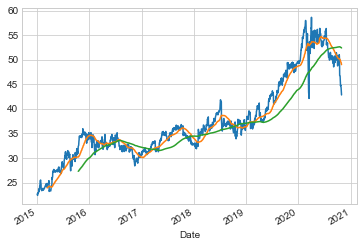

In [13]:
elisa['Close'].plot()

# Lisätään viivakaavioon 50 päivän ja 200 päivän liukuvat keskiarvot
elisa['Close'].rolling(50).mean().plot()
elisa['Close'].rolling(200).mean().plot()

<h2>Muutosprosentit</h2>

Muutosprosentit on kätevää laskea <b>pct_change()</b>-funktiolla.

In [14]:
# Hinnan muutokset prosentteina edellisestä päivästä
elisa['Elisa%'] = elisa['Close'].pct_change()
telia['Telia%'] = telia['Close'].pct_change()

In [15]:
# Yhdistän Elisan ja Telian muutosprosentit samaan dataframeen
muutokset = pd.concat([elisa['Elisa%'], telia['Telia%']], axis = 1)
muutokset

,Elisa%,Telia%
Date,,
2015-01-02,NaN,NaN
2015-01-05,-0.012346,-0.018850
2015-01-07,0.023214,0.007685
2015-01-08,-0.003927,0.030505
2015-01-09,0.001314,-0.020352
...,...,...
2020-10-23,0.003580,0.011638
2020-10-26,-0.012040,-0.012942
2020-10-27,-0.013541,-0.008741


Text(0, 0.5, 'Muutos')

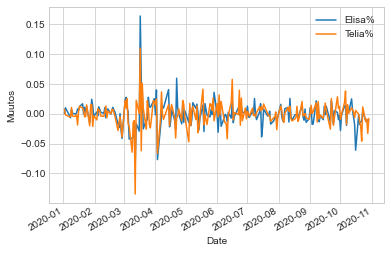

In [16]:
# Muutokset vuoden alusta
ax1 = muutokset['2020':].plot()

ax1.set_ylabel('Muutos')

In [17]:
# Tunnuslukuja muutosprosenteille
muutokset.describe()

,Elisa%,Telia%
count,1462.000000,1462.000000
mean,0.000550,-0.000226
std,0.015215,0.014540
min,-0.092226,-0.134499
25%,-0.006522,-0.007110
50%,0.000750,-0.000494
75%,0.007916,0.007417
max,0.164016,0.109976


In [18]:
# Päivät, jolloin muutosprosentti ollut suurempi kuin 5 %
muutokset[(abs(muutokset['Elisa%']) > 0.05) | (abs(muutokset['Telia%']) > 0.05)]

,Elisa%,Telia%
Date,,
2015-03-27,-0.075697,-0.012712
2015-04-09,0.011499,-0.066554
2015-04-16,0.055984,0.006346
2015-08-24,-0.055172,-0.058611
2015-08-25,0.065693,0.047335
2015-09-03,0.057869,0.032323
2015-09-25,0.061796,0.025510
2016-01-22,0.051540,0.037919
2016-04-01,-0.052092,-0.009645


<h2>Onko viikonpäivällä yhteyttä tuottoprosenttiin?</h2>

In [19]:
# Viikonpäivät omaan sarakkeeseen (0 = maanantai)
muutokset['Weekday'] = muutokset.index.weekday

muutokset.groupby('Weekday')['Elisa%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,290.0,0.001239,0.013350,-0.055172,-0.005331,0.000846,0.008036,0.057805
1,296.0,0.001150,0.016284,-0.038976,-0.007304,0.000389,0.007790,0.164016
2,298.0,0.000899,0.013463,-0.053899,-0.005736,0.000142,0.008159,0.059656
3,294.0,0.000040,0.015977,-0.084077,-0.007434,0.000875,0.008037,0.068757
4,284.0,-0.000615,0.016718,-0.092226,-0.006447,0.001064,0.007594,0.061796


In [20]:
muutokset.groupby('Weekday')['Telia%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,290.0,-0.000180,0.014720,-0.079728,-0.007218,-0.000661,0.007756,0.041424
1,296.0,0.000936,0.014820,-0.046268,-0.006549,-0.000493,0.007406,0.109976
2,298.0,-0.000239,0.012483,-0.061963,-0.006309,-0.000515,0.007552,0.042407
3,294.0,-0.001603,0.016225,-0.134499,-0.008193,-0.000494,0.006652,0.051014
4,284.0,-0.000043,0.014202,-0.066333,-0.007080,0.000000,0.007682,0.083107


<h2>Muutosprosenttien välinen korrelaatio</h2>

In [21]:
# Elisan ja Telian muutosprosentit korreloivat positiivisesti
muutokset.drop('Weekday', axis = 1).corr()

,Elisa%,Telia%
Elisa%,1.000000,0.492025
Telia%,0.492025,1.000000


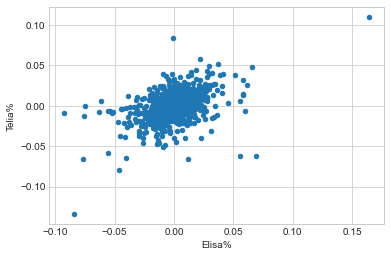

In [22]:
# Muutosprosenttien positiivinen korrelaatio näkyy hyvin hajontakaaviossa
muutokset.plot.scatter(x = 'Elisa%', y = 'Telia%')

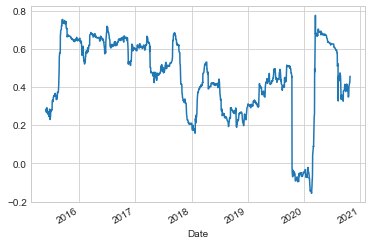

In [23]:
# Liukuva korrelaatio kertoo miten muutosprosentit korreloivat eri aikoina
muutokset['Elisa%'].rolling(100).corr(muutokset['Telia%']).plot()

<h2>Liukuva volatiliteetti</h2>

Volatiliteetti kuvaa osakkeeseen liittyvää riskiä.

Volatiliteetti voidaan laska päivittäisten muutosprosenttien keskihajontana ja se skaaltaaan vuositasolle kertomalla vuoden kaupantekopäivien lukumäärän neliöjuurella.

Liukuva volatiliteetti kuvaa, miten volatiliteetti on muuttunut ajan kuluessa.

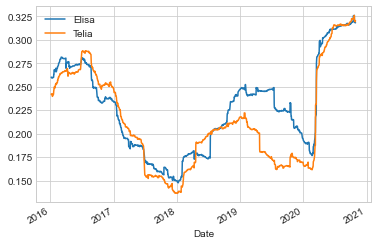

In [24]:
# 252 päivän liukuva volatiliteetti
(muutokset['Elisa%'].rolling(252).std() * (252**0.5)).plot(label = 'Elisa', legend = True)
(muutokset['Telia%'].rolling(252).std() * (252**0.5)).plot(label = 'Telia', legend = True)

<h2>Kahden arvoakselin viivakaavio</h2>

(3.0, 7.0)

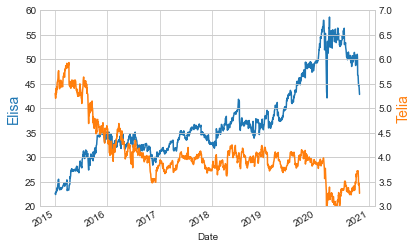

In [25]:
# Viivakaavio Elisan päätöshinnoista (axe)
axe = elisa['Close'].plot(color = 'C0')

# Elisan nimi, väri ja fonttikoko
axe.set_ylabel('Elisa', color = 'C0', fontsize = 14)

# Elisan arvoakselin skaalaus
axe.set_ylim(20, 60)

# Luon Telialle toisen axes-olion (axt), jolla on yhteinen x-akseli axe-olion kanssa
axt = axe.twinx()

# Viivakaavio Telian päätöshinnoista
telia['Close'].plot(ax = axt, color = 'C1')

# Telian nimi, väri ja fonttikoko
axt.set_ylabel('Telia', color = 'C1', fontsize = 14)

# Telian arvoakselin skaalaus
axt.set_ylim(3, 7)